# CLASSIFICATION PROJECT

## Data preparing

### Import library and file

In [77]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.init as init
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/Users/ponynie/Developer/Python_Code/IntroDMLabChula/Final_Project/children anemia.csv')
data.describe(include='all')




,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
count,33824,33824,33824,33824,33824.000000,33824.000000,13095.000000,13095,33824,33824,33824,32131,21102,30622,10144.000000,10144,30622
unique,7,2,4,5,NaN,NaN,NaN,4,2,2,6,2,41,3,NaN,4,3
top,25-29,Rural,No education,Poorest,NaN,NaN,NaN,Not anemic,Yes,No,Married,Living with her,Immediately,No,NaN,Moderate,No
freq,9445,22164,15345,8046,NaN,NaN,NaN,5317,23955,33753,31132,29528,9324,23002,NaN,3905,25290
mean,NaN,NaN,NaN,NaN,1.823616,19.570187,114.361359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.278884,NaN,NaN
std,NaN,NaN,NaN,NaN,0.705562,4.313092,15.922923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.570919,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,12.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,16.000000,105.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,19.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,22.000000,125.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.000000,NaN,NaN


### Data cleaning and separation of categorical and numerical columns

In [78]:
data.drop('Anemia level.1', axis=1, inplace=True)
data.dropna(subset=['Anemia level', 'Had fever in last two weeks','Taking iron pills, sprinkles or syrup'],inplace=True)

data.rename(columns={'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)':
    'Hemoglobin level adjusted for altitude and smoking'}, inplace=True)
data.rename(columns={'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)':
    'Hemoglobin level adjusted for altitude'}, inplace=True)

data['Currently residing with husband/partner'].fillna(data['Currently residing with husband/partner'].mode().iloc[0], inplace=True)
data['Hemoglobin level adjusted for altitude and smoking'].fillna(data['Hemoglobin level adjusted for altitude and smoking'].mean(), inplace=True)

data['Age in 5-year groups'] = data['Age in 5-year groups'].apply(lambda x: sum(map(int,x.split('-')))/2)

data.drop(columns=['When child put to breast', 
                   'Hemoglobin level adjusted for altitude',
                   'Current marital status'],inplace=True)

data = data[data['Currently residing with husband/partner'].isin(['Living with her', 'Staying elsewhere'])]
data = data[data['Had fever in last two weeks'].isin(['No', 'Yes'])]
data = data[data['Taking iron pills, sprinkles or syrup'].isin(['No', 'Yes'])]

categorical_columns = ['Type of place of residence', 
                       'Highest educational level', 
                       'Wealth index combined', 
                       'Have mosquito bed net for sleeping (from household questionnaire)', 
                       'Smokes cigarettes', 'Currently residing with husband/partner', 
                       'Had fever in last two weeks', 
                       'Taking iron pills, sprinkles or syrup']

numerical_columns = ['Age in 5-year groups', 
                     'Births in last five years', 
                     'Age of respondent at 1st birth', 
                     'Hemoglobin level adjusted for altitude and smoking']

label_column = 'Anemia level'

data.head(10)

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking,Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Currently residing with husband/partner,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
3,27.0,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Living with her,No,No
5,32.0,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Living with her,No,No
6,37.0,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Living with her,No,Yes
9,22.0,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Living with her,No,Yes
12,27.0,Urban,Higher,Richest,1,24,116.0,Mild,Yes,No,Living with her,No,No
13,22.0,Urban,Higher,Richest,2,19,118.0,Mild,Yes,No,Living with her,No,Yes
14,22.0,Urban,Higher,Richest,2,19,118.0,Mild,Yes,No,Living with her,No,No
16,27.0,Urban,Higher,Richest,2,22,134.0,Not anemic,Yes,No,Living with her,No,No
17,27.0,Urban,Higher,Richest,2,22,134.0,Not anemic,Yes,No,Living with her,No,No
18,27.0,Urban,Secondary,Richest,2,22,95.0,Moderate,Yes,No,Living with her,No,Yes


<Axes: xlabel='Anemia level', ylabel='Count'>

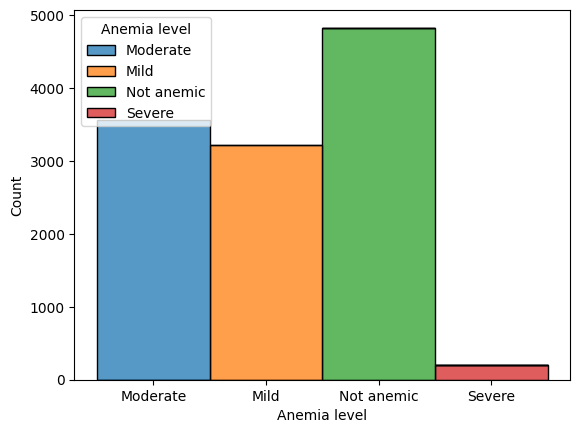

In [79]:
sns.histplot(data=data, x='Anemia level', hue='Anemia level', multiple='stack')

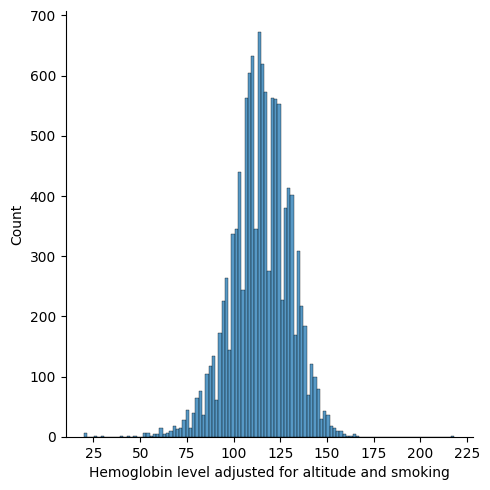

In [80]:
sns.displot(data['Hemoglobin level adjusted for altitude and smoking'])

<Axes: >

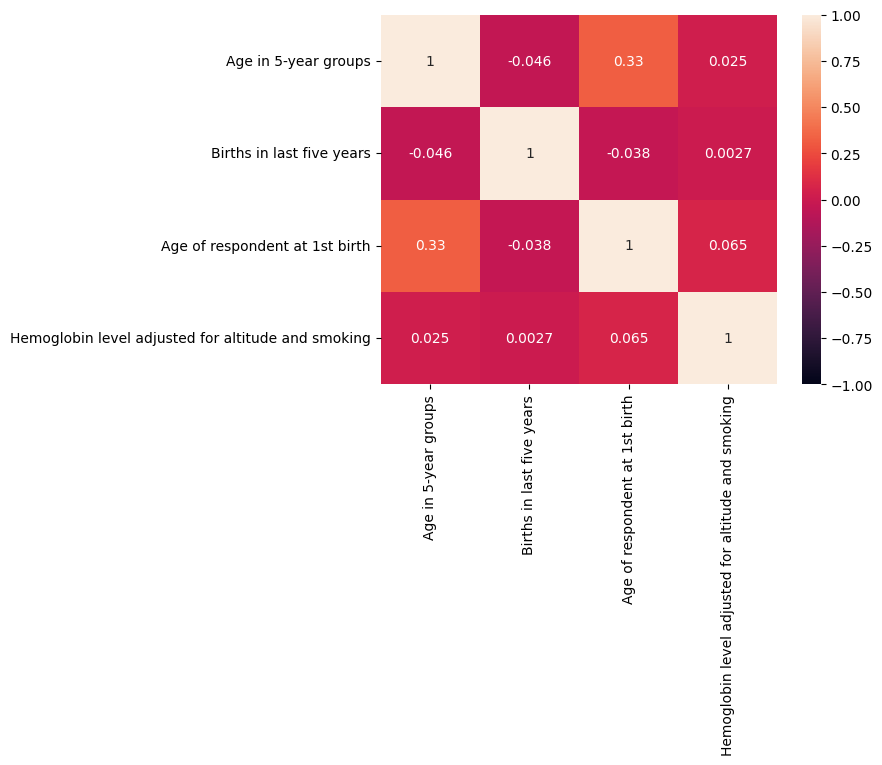

In [81]:
sns.heatmap(data.select_dtypes('number').corr(), annot=True, vmin=-1, vmax=1)

<Axes: xlabel='Anemia level', ylabel='Wealth index combined'>

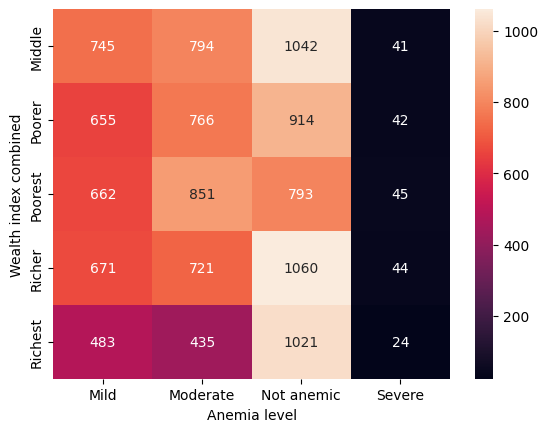

In [82]:
sns.heatmap(pd.crosstab(data['Wealth index combined'], data['Anemia level']), annot=True, fmt='d')

### Change categorical's colums datatype into categorical type in pandas

In [83]:
for category in categorical_columns:
    data[category] = data[category].astype('category')
data[label_column] = data[label_column].astype('category')

for categorical in categorical_columns:
    print(data[categorical].cat.categories, categorical)
print(data[label_column].cat.categories, "Label")

Index(['Rural', 'Urban'], dtype='object') Type of place of residence
Index(['Higher', 'No education', 'Primary', 'Secondary'], dtype='object') Highest educational level
Index(['Middle', 'Poorer', 'Poorest', 'Richer', 'Richest'], dtype='object') Wealth index combined
Index(['No', 'Yes'], dtype='object') Have mosquito bed net for sleeping (from household questionnaire)
Index(['No', 'Yes'], dtype='object') Smokes cigarettes
Index(['Living with her', 'Staying elsewhere'], dtype='object') Currently residing with husband/partner
Index(['No', 'Yes'], dtype='object') Had fever in last two weeks
Index(['No', 'Yes'], dtype='object') Taking iron pills, sprinkles or syrup
Index(['Mild', 'Moderate', 'Not anemic', 'Severe'], dtype='object') Label


### Encode categorical type with it number codes and convert it to Tensor

In [84]:
categorical_np = [data[i].cat.codes.values for i in categorical_columns]
categorical_data = np.stack(categorical_np, 1)
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[1, 3, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 3, 4, 1, 0, 0, 0, 1],
        [1, 3, 4, 1, 0, 0, 0, 1],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 1],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 3, 4, 1, 0, 0, 0, 1]])

### Convert numerical columns to Tensor

In [85]:
numerical_data = np.stack([data[i].values for i in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:10]

tensor([[ 27.,   1.,  25.,  95.],
        [ 32.,   1.,  30., 113.],
        [ 37.,   2.,  32., 121.],
        [ 22.,   1.,  19., 108.],
        [ 27.,   1.,  24., 116.],
        [ 22.,   2.,  19., 118.],
        [ 22.,   2.,  19., 118.],
        [ 27.,   2.,  22., 134.],
        [ 27.,   2.,  22., 134.],
        [ 27.,   2.,  22.,  95.]])

### Convert output label into Tensor

In [86]:
outputs = torch.tensor(data[label_column].cat.codes.values).flatten()
outputs[:10]

tensor([1, 0, 2, 1, 0, 0, 0, 2, 2, 1], dtype=torch.int8)

### Check correctness of dimension

In [87]:
categorical_data.shape, numerical_data.shape, outputs.shape

(torch.Size([11809, 8]), torch.Size([11809, 4]), torch.Size([11809]))

### Split the data into trainset and testset

In [88]:
total_records = data.shape[0]
test_records = int(total_records * .2) # 20% of the data for testing
train_records = total_records - test_records # 80% of the data for training

categorical_train_data = categorical_data[:train_records]
categorical_test_data = categorical_data[train_records:]
numerical_train_data = numerical_data[:train_records]
numerical_test_data = numerical_data[train_records:]
train_label = outputs[:train_records]
test_label = outputs[train_records:]

print(categorical_train_data.shape, categorical_test_data.shape)
print(numerical_train_data.shape, numerical_test_data.shape)
print(train_label.shape, test_label.shape)

torch.Size([9448, 8]) torch.Size([2361, 8])
torch.Size([9448, 4]) torch.Size([2361, 4])
torch.Size([9448]) torch.Size([2361])


## Training

### Define network topology

In [89]:
class Model(nn.Module):

    def __init__(self,num_categorical_cols, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x_categorical, x_numerical], 1)
        x = self.layers(x)
        return x 

### Select hidden layer size and instantiate the model

In [90]:
hidden_layers = [200,100,50]
class_count = int(data[label_column].cat.codes.nunique())
model = Model(categorical_data.shape[1], numerical_data.shape[1], class_count, hidden_layers, p=0.5)
print(model)

Model(
  (batch_norm_num): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


### Move all Tensor into MPS (Apple silicon) device for GPU acceleration

In [91]:
if torch.backends.mps.is_available():
    print ("MPS device found.")
else:
    print("MPS device not found.")

mps_device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

model.to(mps_device)
categorical_train_data = categorical_train_data.to(mps_device)
numerical_train_data = numerical_train_data.to(mps_device)
categorical_test_data = categorical_test_data.to(mps_device)
numerical_test_data = numerical_test_data.to(mps_device)
train_label = train_label.to(mps_device)
test_label = test_label.to(mps_device)  

MPS device found.


### Create custom dataset for train dataset in batch

In [92]:
class CustomDataset(TensorDataset):
    def __init__(self, x_categorical, x_numerical, y):
        super().__init__(x_categorical, x_numerical, y)
        self.x_categorical = x_categorical
        self.x_numerical = x_numerical
        self.y = y

    def __getitem__(self, index):
        return self.x_categorical[index], self.x_numerical[index], self.y[index]

    def __len__(self):
        return len(self.y)

### Hyper parameter

In [93]:
train_dataset = CustomDataset(categorical_train_data, numerical_train_data, train_label)
train_loader = DataLoader(dataset=train_dataset, batch_size=1000, shuffle=True)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 100

### The traning loop

Epoch:   1 Batch: 0 Loss: 1.5522854328155518
Epoch:   1 Batch: 4 Loss: 1.327212929725647
Epoch:   1 Batch: 8 Loss: 1.1415598392486572
Epoch:   1 Loss: 1.30125189
Epoch:  26 Batch: 0 Loss: 0.3733670115470886
Epoch:  26 Batch: 4 Loss: 0.39191606640815735
Epoch:  26 Batch: 8 Loss: 0.3574337363243103
Epoch:  26 Loss: 0.37491432
Epoch:  51 Batch: 0 Loss: 0.30910611152648926
Epoch:  51 Batch: 4 Loss: 0.31788089871406555
Epoch:  51 Batch: 8 Loss: 0.3161839544773102
Epoch:  51 Loss: 0.32522395
Epoch:  76 Batch: 0 Loss: 0.2943154275417328
Epoch:  76 Batch: 4 Loss: 0.35069409012794495
Epoch:  76 Batch: 8 Loss: 0.3239276111125946
Epoch:  76 Loss: 0.30669957
Final Epoch: 100 Loss: 0.2956584990


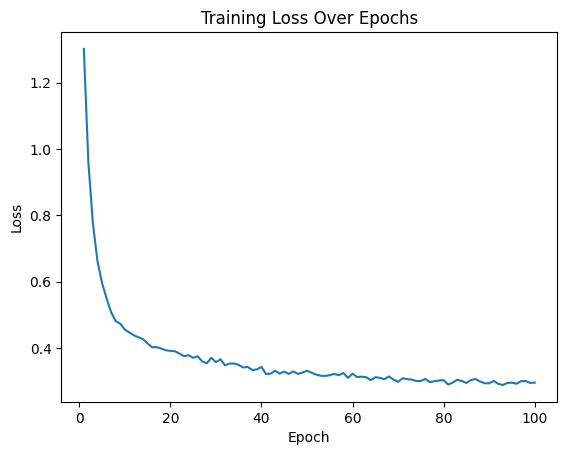

In [94]:
model.train()
aggregated_losses = []

for epoch in range(1, epochs + 1):
    epoch_loss = []
    for batch_idx, (categorical, numerical, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        pred = model(categorical, numerical)
        loss = loss_function(pred, labels)
        epoch_loss.append(loss.item())
        if epoch % 25 == 1 and batch_idx % 4 == 0:
            print(f'Epoch: {epoch:3} Batch: {batch_idx} Loss: {loss.item()}')
        loss.backward()
        optimizer.step()  
    
    mean_epoch_loss = torch.tensor(epoch_loss).mean()
    aggregated_losses.append(mean_epoch_loss)

    if epoch % 25 == 1:
        print(f'Epoch: {epoch:3} Loss: {mean_epoch_loss:10.8f}')

print(f'Final Epoch: {epoch:3} Loss: {mean_epoch_loss:10.10f}')

# Plotting
plt.plot(range(1, epochs + 1), aggregated_losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Validation

### Model evaluation

In [95]:
with torch.no_grad():
    model.eval()
    eval = model(categorical_test_data, numerical_test_data)
    loss = loss_function(eval, test_label)
    print(f'Loss: {loss:.8f}')


Loss: 0.25558493


In [96]:
print(eval[:5])
eval = np.argmax(eval.detach().cpu(), axis=1)
print(eval[:5])

tensor([[  0.3976,   3.8163,  -3.5434,  -0.6839],
        [  0.2669,   4.0193,  -3.9572,  -0.4936],
        [ -4.7872,   5.9971, -10.1637,   7.7651],
        [  1.1964,   3.0561,  -1.9703,  -1.8816],
        [  1.1518,   3.1872,  -2.2245,  -1.8172]], device='mps:0')
tensor([1, 1, 3, 1, 1])


### Report performance

In [97]:
test_label = test_label.detach().cpu()
print(confusion_matrix(test_label,eval))
print("--------------------------------------------------------------------------------")
print(classification_report(test_label,eval))
print("--------------------------------------------------------------------------------")
print(f"accuracy: {accuracy_score(test_label, eval)*100} %")

[[553  89   6   0]
 [  8 610   0   0]
 [ 74   2 987   0]
 [  0   8   0  24]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       648
           1       0.86      0.99      0.92       618
           2       0.99      0.93      0.96      1063
           3       1.00      0.75      0.86        32

    accuracy                           0.92      2361
   macro avg       0.93      0.88      0.90      2361
weighted avg       0.93      0.92      0.92      2361

--------------------------------------------------------------------------------
accuracy: 92.07962727657772 %


### Inference with unseen data

In [98]:
unseen = pd.read_csv('/Users/ponynie/Developer/Python_Code/IntroDMLabChula/Final_Project/unseen.csv')

unseen.rename(columns={'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)':
    'Hemoglobin level adjusted for altitude and smoking'}, inplace=True)
unseen.rename(columns={'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)':
    'Hemoglobin level adjusted for altitude'}, inplace=True)

unseen['Age in 5-year groups'] = unseen['Age in 5-year groups'].apply(lambda x: sum(map(int,x.split('-')))/2)
unseen.drop(columns=['When child put to breast', 
                     'Hemoglobin level adjusted for altitude', 
                     'Current marital status'],inplace=True)

categorical_columns = ['Type of place of residence', 
                       'Highest educational level', 
                       'Wealth index combined', 
                       'Have mosquito bed net for sleeping (from household questionnaire)', 
                       'Smokes cigarettes', 'Currently residing with husband/partner', 
                       'Had fever in last two weeks', 
                       'Taking iron pills, sprinkles or syrup']

numerical_columns = ['Age in 5-year groups', 
                     'Births in last five years', 
                     'Age of respondent at 1st birth', 
                     'Hemoglobin level adjusted for altitude and smoking']

for category in categorical_columns:
    unseen[category] = unseen[category].astype('category')
categorical_np = [unseen[i].cat.codes.values for i in categorical_columns]
categorical_data = np.stack(categorical_np, 1)
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
numerical_data = np.stack([unseen[i].values for i in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)

model.to('cpu')
model.eval()
with torch.no_grad():
    logit = model(categorical_data, numerical_data)
    infer = np.argmax(logit, axis=1)
    logit = logit.numpy()
    infer = infer.numpy()
    unseen['Prediction'] = infer
    unseen['confidence 0'] = logit[:,0]
    unseen['confidence 1'] = logit[:,1]
    unseen['confidence 2'] = logit[:,2]
    unseen['confidence 3'] = logit[:,3]
    label_mapping = {0: 'Mild', 1: 'Moderate', 2: 'Not anemic', 3: 'Severe'}
    unseen['Prediction'] = unseen['Prediction'].map(label_mapping) 
    unseen.to_csv('prediction_unseen.csv', index=False)

    
    